In [1]:
from math import sin
from math import pi
from matplotlib import pyplot as plt

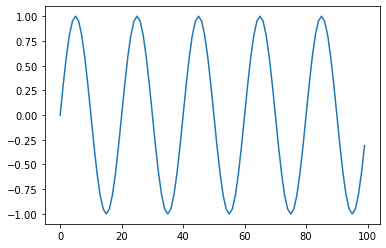

In [2]:
# create sequence
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/length)) for i in range(length)]
# plot sequence
plt.plot(sequence)
plt.show()

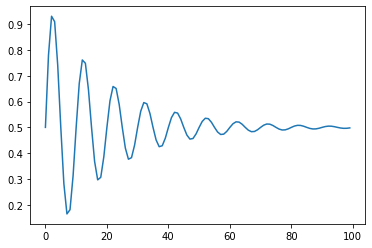

In [3]:
# create sequence
from math import exp
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
# plot sequence
plt.plot(sequence)
plt.show()

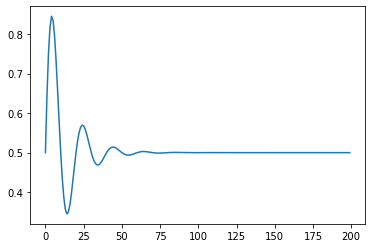

In [4]:
# Random Damped Sine Waves
# generate damped sine wave in [0,1]

def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

sequnce=generate_sequence(200,20,.08)
plt.plot(sequnce)
plt.show()

In [5]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot as plt

In [6]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [7]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

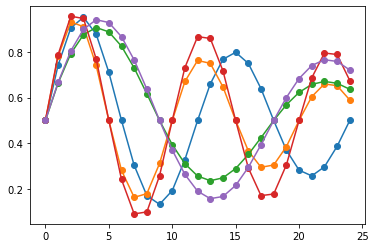

In [13]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], "-o" )
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# configure problem
length = 50
output = 5
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss="mae" , optimizer="adam" )
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# fit model
X, y = generate_examples(length, 10000, output)
model.fit(X, y, batch_size=10, epochs=1)

1000/1000 [==============================] - 17s 17ms/step - loss: 0.0404


In [22]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print( "MAE: %f" %loss)

MAE: 0.023180


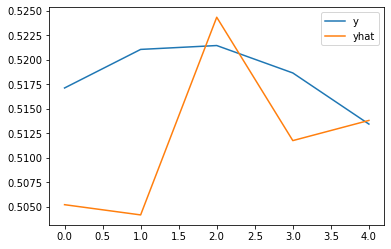

In [23]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label= "y" )
pyplot.plot(yhat[0], label= "yhat" )
pyplot.legend()
pyplot.show()